This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

#Adding random noise with size of len(train_images) using np.random.random we take random value matric of the size len...
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

#Adding 0 vectors
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
#original dimension
train_images.shape 

(60000, 784)

In [3]:
#we want to add this size of random noise to the original training dataset
(len(train_images), 784)

(60000, 784)

In [4]:
train_images_with_noise_channels.shape

(60000, 1568)

In [5]:
np.random.random((len(train_images), 784))

array([[0.08886975, 0.84628715, 0.31105836, ..., 0.71282508, 0.99709195,
        0.77162117],
       [0.93146821, 0.05283217, 0.59314458, ..., 0.50798124, 0.11631802,
        0.31417045],
       [0.05485745, 0.16579159, 0.69359162, ..., 0.73656371, 0.15223689,
        0.39200479],
       ...,
       [0.91451814, 0.96423084, 0.72451082, ..., 0.11539457, 0.41448289,
        0.24780548],
       [0.50155125, 0.80904093, 0.64260779, ..., 0.35140386, 0.36112268,
        0.76316836],
       [0.53505507, 0.67521667, 0.79495449, ..., 0.16367806, 0.93261964,
        0.65356936]])

In [6]:
train_images, np.zeros((len(train_images), 784))

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

**Training the same model on MNIST data with noise channels or all-zero channels**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

#training
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
#plot the history
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 5ms/step - loss: 0.6287 - accuracy: 0.8099 - val_loss: 0.3531 - val_accuracy: 0.8928
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2570 - accuracy: 0.9211 - val_loss: 0.1961 - val_accuracy: 0.9406
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1630 - accuracy: 0.9498 - val_loss: 0.1602 - val_accuracy: 0.9523
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1143 - accuracy: 0.9638 - val_loss: 0.1885 - val_accuracy: 0.9414
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0838 - accuracy: 0.9727 - val_loss: 0.1228 - val_accuracy: 0.9638
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0630 - accuracy: 0.9797 - val_loss: 0.1559 - val_accuracy: 0.9586
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0458 - accuracy: 0.9850 - val_loss: 0.1643 - val_accuracy: 0.9554
Epoch 

In [8]:
#training data with original data
#The performance is a little better if we look at the accuracy
model = get_model()
history1 = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2890 - accuracy: 0.9162 - val_loss: 0.1521 - val_accuracy: 0.9562
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1209 - accuracy: 0.9646 - val_loss: 0.1065 - val_accuracy: 0.9680
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0784 - accuracy: 0.9766 - val_loss: 0.0967 - val_accuracy: 0.9703
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0555 - accuracy: 0.9840 - val_loss: 0.0819 - val_accuracy: 0.9772
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0411 - accuracy: 0.9876 - val_loss: 0.0816 - val_accuracy: 0.9769
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0319 - accuracy: 0.9904 - val_loss: 0.0804 - val_accuracy: 0.9766
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0239 - accuracy: 0.9934 - val_loss: 0.0787 - val_accuracy: 0.9783
Epoch 

**Plotting a validation accuracy comparison**

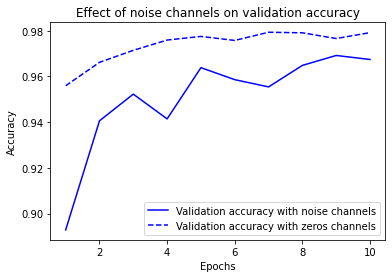

In [9]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
#if we had the random noise, it will cause suspisious correlation and perofrmance goes down. 
#not recommended to add random noise in classification

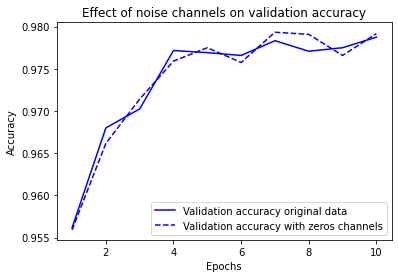

In [10]:
import matplotlib.pyplot as plt
val_acc = history1.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc, "b-",
         label="Validation accuracy original data")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
#the 2 validation are quite similar

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [11]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)
#the accuracy is increasing with the epochs. The validation accuracy is constant at 10%
#in this case it's overfitting compare to the dataset
#If validation accuracy is not increasing then we should review dataset & model

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3180 - accuracy: 0.1059 - val_loss: 2.3073 - val_accuracy: 0.0995
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2996 - accuracy: 0.1162 - val_loss: 2.3143 - val_accuracy: 0.0978
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2906 - accuracy: 0.1285 - val_loss: 2.3194 - val_accuracy: 0.1028
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2758 - accuracy: 0.1392 - val_loss: 2.3287 - val_accuracy: 0.0994
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2581 - accuracy: 0.1544 - val_loss: 2.3465 - val_accuracy: 0.1023
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2368 - accuracy: 0.1688 - val_loss: 2.3486 - val_accuracy: 0.1000
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2115 - accuracy: 0.1853 - val_loss: 2.3757 - val_accuracy: 0.0983

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

In [13]:
num_validation_samples=10000
np.random.shuffle(data) #shuffling the data is usually appropriate
validation_data=data[:num_validation_samples] #define the validation set
training_data=data[num_validation_samples:] #defines the training set

#trains a model on the training data, and evaluates it on the validation data
model=get_model()
model.fit(training_data,...)
validation_score=model.evaluate(validation_data,...) 

#at this point you can tune your model, retrain it, evaluate it, tune it again...
#once you've tuned your hyperparameters it's common to train your final model from scratch on all non test data avaliable
model=get_model()
model.fit(np.concatenate([training_data, validation_data]), ...)
test_score = model.evaluate(test_data, ...)

NameError: ignored

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [14]:
#Training a MNIST model with an incorrectly high learning rate
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 969.7648 - accuracy: 0.4630 - val_loss: 2.2133 - val_accuracy: 0.2561
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.9703 - accuracy: 0.3130 - val_loss: 4.1232 - val_accuracy: 0.3787
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 3.4465 - accuracy: 0.3118 - val_loss: 4.9398 - val_accuracy: 0.3423
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 2.8468 - accuracy: 0.2984 - val_loss: 2.5461 - val_accuracy: 0.3013
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 3.2960 - accuracy: 0.3141 - val_loss: 2.3444 - val_accuracy: 0.3594
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6136 - accuracy: 0.3281 - val_loss: 2.3219 - val_accuracy: 0.3243
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 2.4512 - accuracy: 0.3282 - val_loss: 2.0257 - val_accuracy: 0.3345
Epoc

**The same model with a more appropriate learning rate**

In [ ]:
#The same model with a more appropriate learning rate
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [15]:
#a simple logistic regression on MNIST
model = keras.Sequential([layers.Dense(10, activation="softmax")]) #we only define 1 simple layer with softmax activation same as logistic regression 
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)
#the validation loss is going down so the model is fitting 

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6868 - accuracy: 0.8279 - val_loss: 0.3606 - val_accuracy: 0.9038
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3518 - accuracy: 0.9038 - val_loss: 0.3088 - val_accuracy: 0.9137
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3156 - accuracy: 0.9118 - val_loss: 0.2906 - val_accuracy: 0.9183
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2993 - accuracy: 0.9161 - val_loss: 0.2812 - val_accuracy: 0.9222
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2893 - accuracy: 0.9187 - val_loss: 0.2764 - val_accuracy: 0.9221
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2827 - accuracy: 0.9205 - val_loss: 0.2716 - val_accuracy: 0.9251
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2775 - accuracy: 0.9226 - val_loss: 0.2687 - val_accuracy: 0.9267
Epoch 

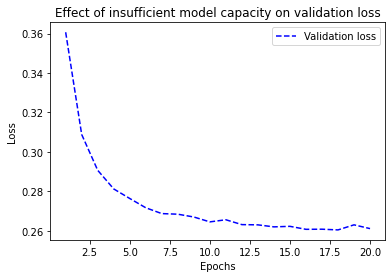

In [16]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
#use bigger model
#this time 3 layers 
#we can see the minimum and after it's increasing again (= overfitting)
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Summary